## Importing dependencies and define helper functions

In [7]:
import gymnasium
from gymnasium.wrappers import RecordVideo
from gymnasium import logger as gymlogger

import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as tnf
from collections import deque

import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

# Set gym logger level to show only errors
import logging
# gymlogger.setLevel(logging.ERROR)

# # Function to display a recorded video from the 'video/' directory
# def show_video():
#     mp4list = glob.glob('video/*.mp4')
#     if len(mp4list) > 0:
#         mp4 = mp4list[0]
#         video = io.open(mp4, 'r+b').read()
#         encoded = base64.b64encode(video).decode('ascii')
#         display_html = f'''
#         <video alt="Recorded video" autoplay loop controls style="height: 400px;">
#             <source src="data:video/mp4;base64,{encoded}" type="video/mp4" />
#         </video>
#         '''
#         ipythondisplay.display(HTML(display_html))
#     else: 
#         print("⚠️ Could not find any video in the 'video/' folder.")


In [21]:
env = gymnasium.make("CartPole-v1")
# Parameters
LEARNING_RATE = 0.01
DISCOUNT = 0.95
EPISODES = 8000
epsilon = 1.0
epsilon_decay = 0.99944
min_epsilon = 0.01

# State space discretization
bins = [4, 4, 10, 40]
lower_bounds = np.array([-4.8, -5.0, -0.418, -5.0])
upper_bounds = np.array([4.8, 5.0, 0.418, 5.0])
bin_sizes = (upper_bounds - lower_bounds) / bins

# Q-table
q_table = np.random.uniform(low=0, high=1, size=(bins + [env.action_space.n]))

## TASK 1: Developing an RL agent

Episode 0 | Avg Reward (last 100): 24.00 | Epsilon: 0.9994
Episode 500 | Avg Reward (last 100): 20.49 | Epsilon: 0.7553
Episode 1000 | Avg Reward (last 100): 18.38 | Epsilon: 0.5708
Episode 1500 | Avg Reward (last 100): 18.55 | Epsilon: 0.4314
Episode 2000 | Avg Reward (last 100): 17.97 | Epsilon: 0.3260
Episode 2500 | Avg Reward (last 100): 17.83 | Epsilon: 0.2464
Episode 3000 | Avg Reward (last 100): 17.44 | Epsilon: 0.1862
Episode 3500 | Avg Reward (last 100): 16.58 | Epsilon: 0.1407
Episode 4000 | Avg Reward (last 100): 16.42 | Epsilon: 0.1063
Episode 4500 | Avg Reward (last 100): 16.17 | Epsilon: 0.0804
Episode 5000 | Avg Reward (last 100): 17.07 | Epsilon: 0.0607
Episode 5500 | Avg Reward (last 100): 16.53 | Epsilon: 0.0459
Episode 6000 | Avg Reward (last 100): 16.77 | Epsilon: 0.0347
Episode 6500 | Avg Reward (last 100): 16.60 | Epsilon: 0.0262
Episode 7000 | Avg Reward (last 100): 15.58 | Epsilon: 0.0198
Episode 7500 | Avg Reward (last 100): 16.71 | Epsilon: 0.0150


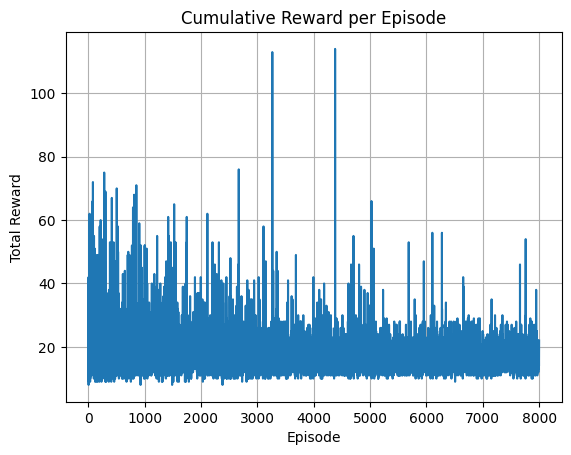

Final Average Reward over 100 episodes: 16.34


In [22]:
def get_discrete_state(state):
    """Convert continuous state to discrete bin index"""
    clipped = np.clip(state, lower_bounds, upper_bounds)
    discrete = ((clipped - lower_bounds) / bin_sizes).astype(int)
    return tuple(discrete)

# For tracking performance
rewards_per_episode = []

for episode in range(EPISODES):
    state, _ = env.reset()
    discrete_state = get_discrete_state(state)
    total_reward = 0
    done = False

    while not done:
        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[discrete_state])

        next_state, reward, done, _, _ = env.step(action)
        next_discrete_state = get_discrete_state(next_state)

        # Update Q-table using Bellman Equation
        max_future_q = np.max(q_table[next_discrete_state])
        current_q = q_table[discrete_state + (action,)]
        new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
        q_table[discrete_state + (action,)] = new_q

        discrete_state = next_discrete_state
        total_reward += reward

    # Decay epsilon
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay
        epsilon = max(min_epsilon, epsilon)

    rewards_per_episode.append(total_reward)

    # Optional: print progress
    if episode % 500 == 0:
        avg = np.mean(rewards_per_episode[-100:])
        print(f"Episode {episode} | Avg Reward (last 100): {avg:.2f} | Epsilon: {epsilon:.4f}")

# Plotting (for Task 2)
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Cumulative Reward per Episode")
plt.grid()
plt.show()

# Print final average over last 100 episodes
final_avg = np.mean(rewards_per_episode[-100:])
print(f"Final Average Reward over 100 episodes: {final_avg:.2f}")


In [ ]:


observation = env.reset()
print("Initial observations:", observation)
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))


Observation = [4, 4, 10, 40] 
#  cart pos, cart vel, pole angle, pole angular vel
np_array_win_size = np.array([2.5, 2.5, 0.1, 0.25])
epsilon = 1
epsilon_decay_value = 0.99944

q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))